# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [75]:
#Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting into training and testing data
from sklearn.model_selection import train_test_split

#Model performance checking
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Building linear regression model
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Computing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the dataset

In [5]:
data = pd.read_csv('/content/used_device_data.csv')
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [6]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Observations
#### The dataset had 15 columns and the data seems to be entered and structured correctly.

In [7]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [8]:
df.shape

(3454, 15)

## Observation
#### The dataset had 3454 rows and 15 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## Observation
#### The dataset contained different datatypes ranging from strings or objects (brand name, os, 4g and 5g) float (screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight,normalized_used_price, normalized_new_price), integer (release_year and days_used).  Also, there seems to be some missing values in main_camera_mp, selfie_camera_mp,int_memory,ram, battery, and weight. The memory usage in soring the data is about 405 KB.

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


## Observation
#### The most popular brand fell among the 'other' category while the most popular OS is the Android. The average screen size is about 13.7 cm and it ranges from 5.08 cm to 30.71 cm. The average resolution of the main camera is about 9.5 MP and it ranges from 0.08 MP to 48 MP whereas for the selfie camera, the average resolution is about 6.6 MP and it ranges from 0 MP to about 32 MP. The average internal memory of the phones is about 55 Gb and it ranges from 0.01 Gb to about 1 Tb. Similarly, the average size of the ram for all phones is about 4 Gb while the maximum ram is about 12 Gb. The average normalized price of a used phone and a new phone are 4.3 euros and 5.2 euros respectively and the normalized prices ranges from 1.5 euros to 6.6 euros and 2.9 euros to 7.8 euros respectively

In [11]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

## Observation
#### There are no duplicates in the dataset

In [12]:
# Checking for missing data
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


## Observation
#### There are missing data in the dataset. The main_camera_mp column has the highest number of missing data (179). The missing data will be treated in subsequent sections.

In [13]:
df['main_camera_mp'].value_counts(dropna = False)

,count
main_camera_mp,
13.00,1035
8.00,755
5.00,546
12.00,189
NaN,179
2.00,171
16.00,154
3.15,122
0.30,69


## Observation
#### The phone whose main camera resolution is 13 MP has the highest count which means its the most preferred by the customers. However, it can be seen that 179 entries had null values (NaN) which is the missing data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 4, 7))
    else:
        plt.figure(figsize=(n + 4, 7))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

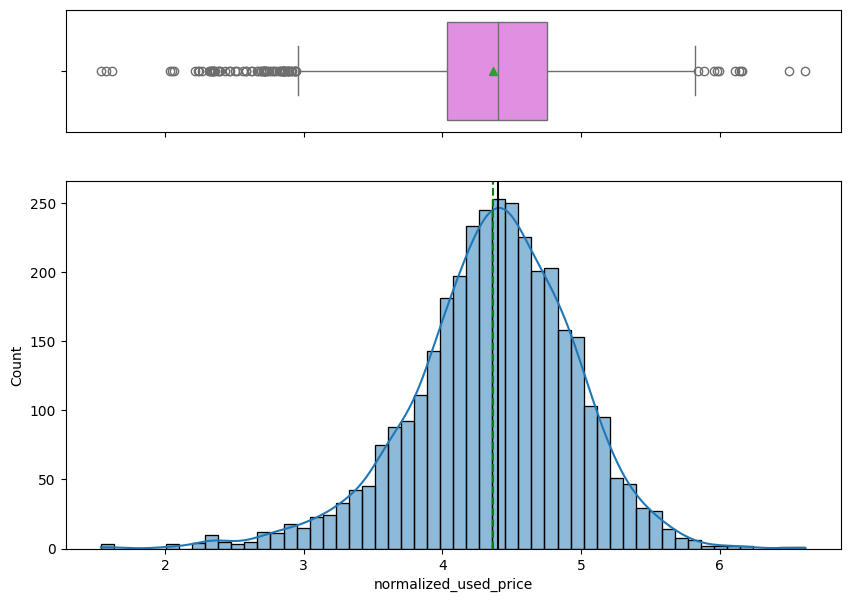

In [16]:
#Histogram and boxplot for the normalized used price
histogram_boxplot(df, "normalized_used_price")

## Observation
#### The distribution of the normalized price of used phone is almost normal since the median and the mean are almost close although the left tail is excessively long which indicate some skewness in the data as confirmed by the boxplot which shows a lot of outliers to the left. The mean and median normalized price of the used is approximately 4.4 euros.

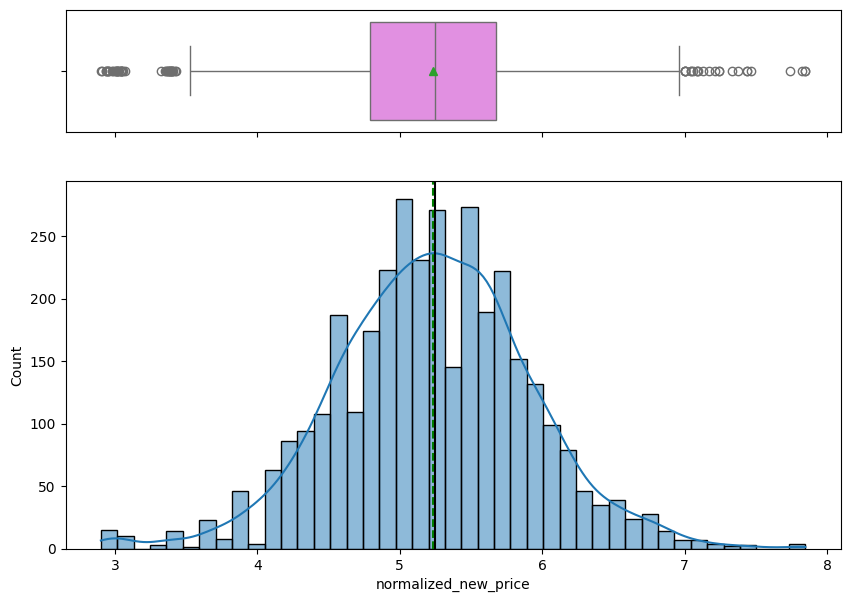

In [17]:
#Histogram and boxplot for the normalized new price
histogram_boxplot(df, "normalized_new_price")

## Observation
#### The distribution of the normalized new price of the phones appears to be normal since the mean and the median are almost identical. However, there seem to be more outliers the right side of the boxplot. From both plots, it can be observed that the average and median normalized new price of the phone is approximately 5.2 euros.

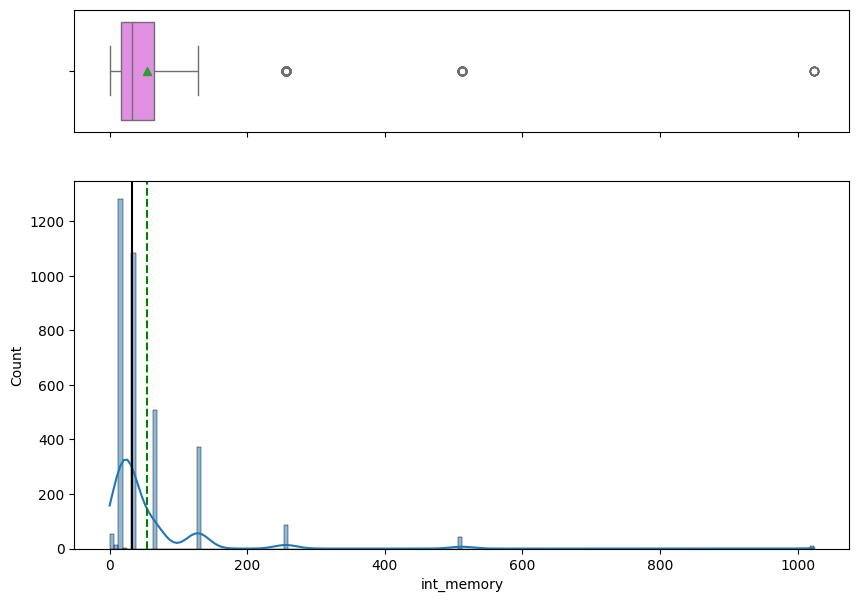

In [18]:
#Histogram and boxplot for the internal memory
histogram_boxplot(df, "int_memory")

## Observation
#### The distribution of the internal memory data is not normal since the mean and median are far apart and it is heavily skewed to the right as lots of the outliers can be seen to the right of the boxplot.

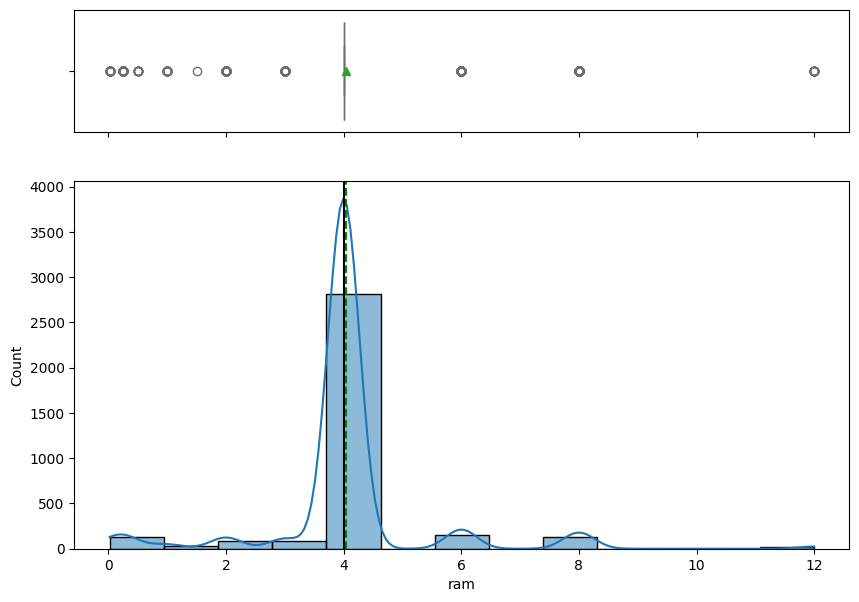

In [19]:
#Histogram and boxplot for the ram data
histogram_boxplot(df, "ram")

## Observation
#### The body of the boxplot for the ram data was not evident because the values of the mean, median, 25 percentile and 75 percentile are approximately the same (4 Gb) and the though the distribution appears to be normal, but the tails on both sides are excessively long and irregular due to the presence of lots of outliers.

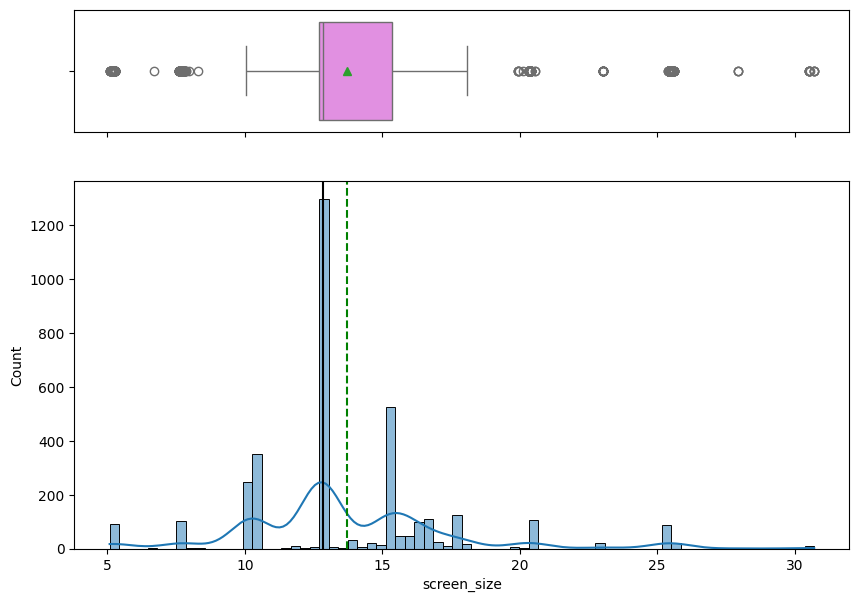

In [20]:
#Histogram and boxplot for the screen_size data
histogram_boxplot(df, "screen_size")

## Observation
#### The distribution of the screen size data is not normal because the mean and the median are far apart and there are lots of outliers to both sides of the boxplots.

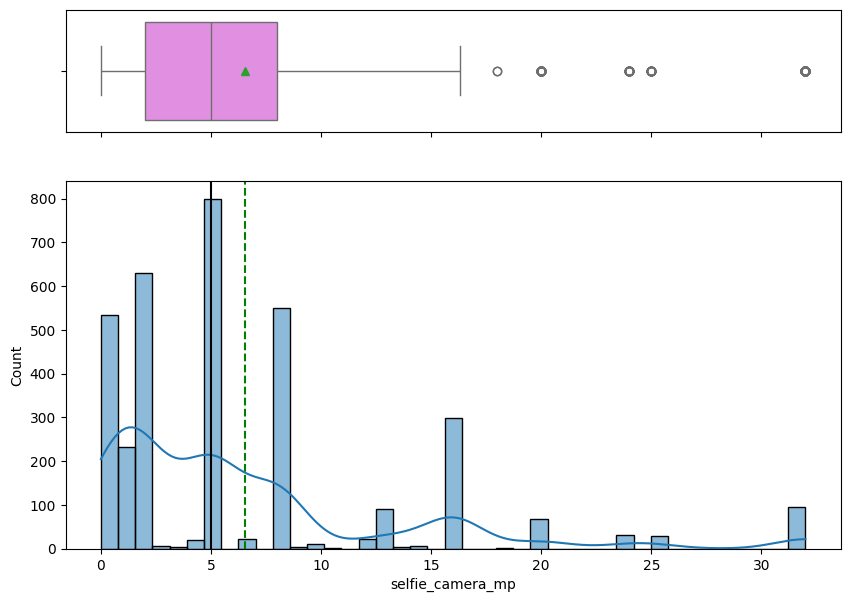

In [21]:
#Histogram and boxplot for the selfie_camera MP data
histogram_boxplot(df, "selfie_camera_mp")

## Observation
#### The distribution of the selfie camera resolution data is not normal. The mean and the median values are far apart. There are lots of outliers to the right of the boxplots, hence the data is right-skewed. The average resolution of the selfie camera is about 7 MP.

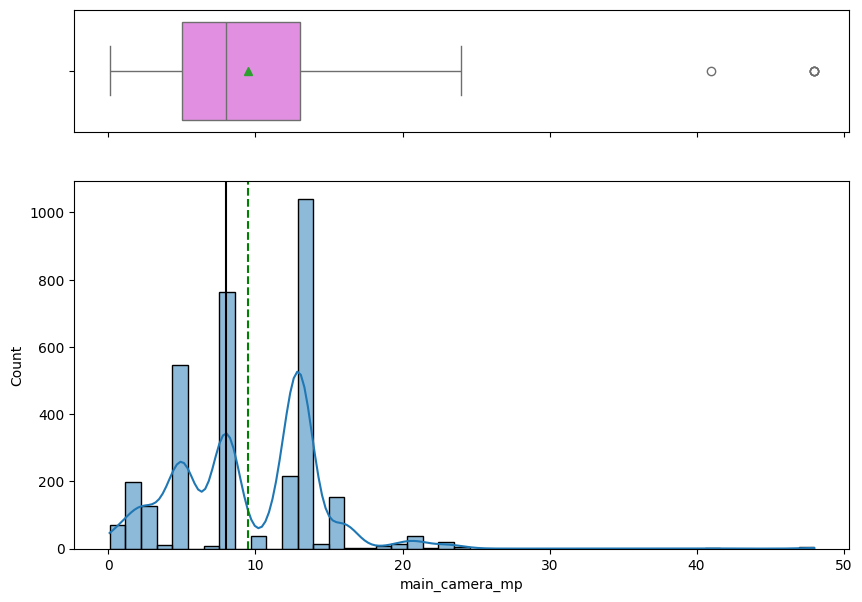

In [22]:
#Histogram and boxplot for the main camera data
histogram_boxplot(df, "main_camera_mp")

## Observation
#### The main camera resolution data is not normal both from the shape of the distribution curve and from the fact that the mean and the median values are far apart. There are outliers observed to the right of the boxplot. The average resolution for the main camera is about 10 MP.

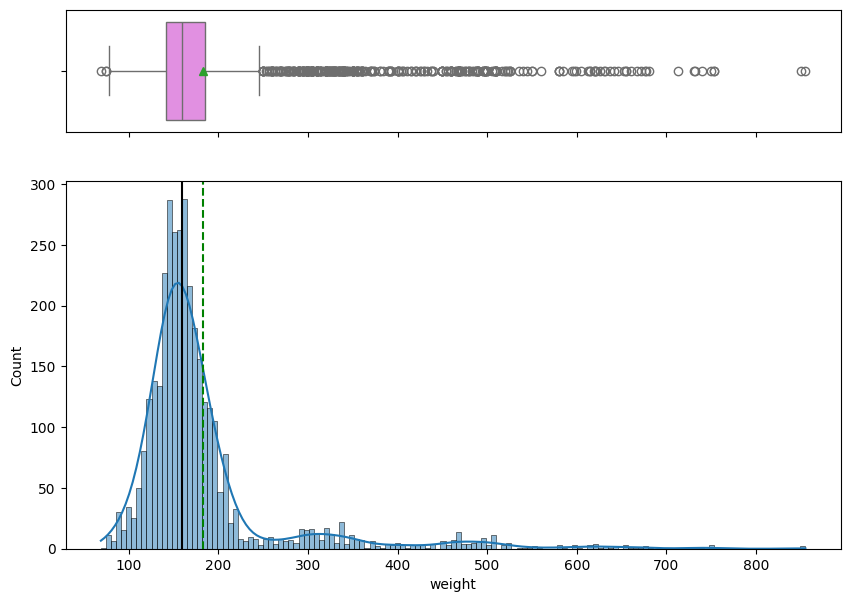

In [23]:
#Histogram and boxplot for the weight data
histogram_boxplot(df, "weight")

## Observation
#### The distribution of the weight data is close to normal but it is heavily skewed to the right due to the presence of lots of outliers.The average weight of the phone is about 175 g.

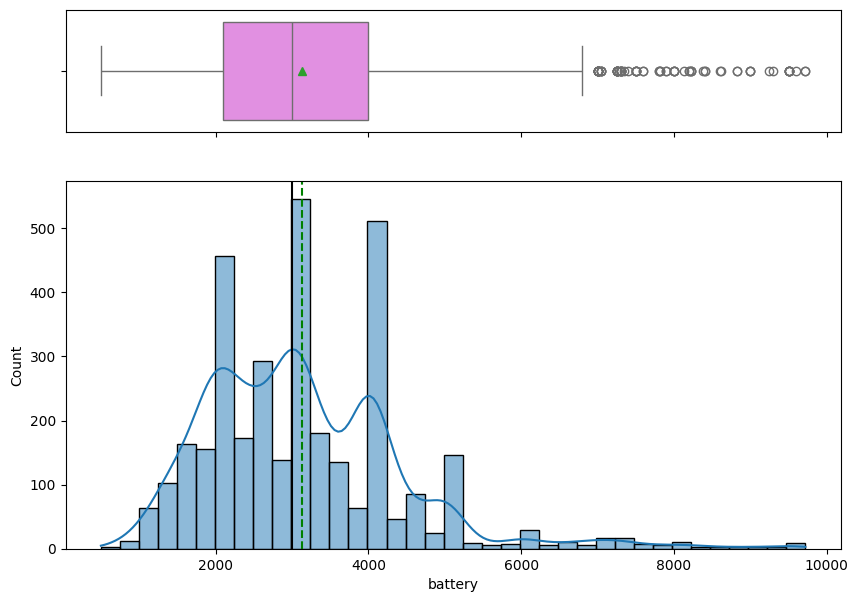

In [24]:
#Histogram and boxplot for the battery data
histogram_boxplot(df, "battery")

## Observation
#### Although the mean and the median values of the battery life are close, yet the distribution is not normal due to the presence of the outliers  to the right of the boxplot, hence the curve is right-skewed.

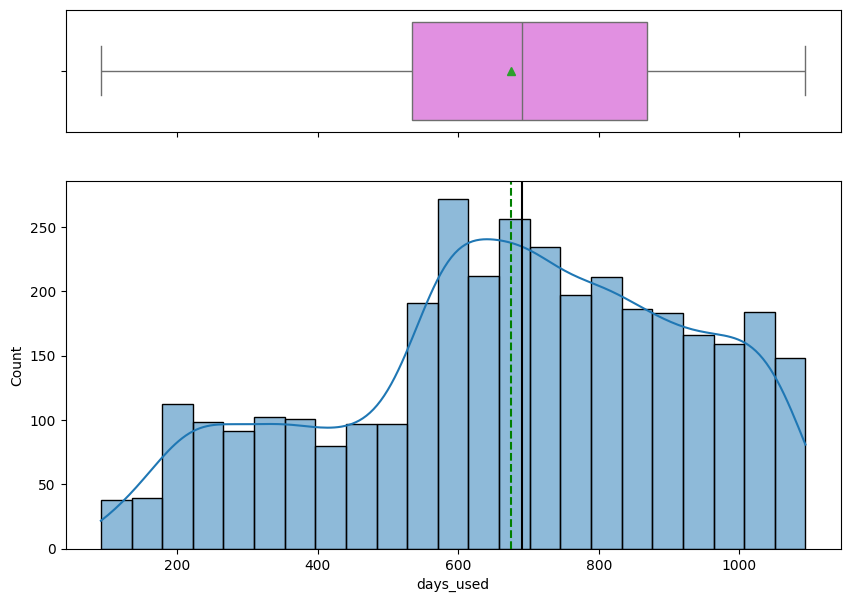

In [25]:
#Histogram and boxplot for the days_used data
histogram_boxplot(df, "days_used")

## Observation
#### The distribution of the days the phones were used is not normal in spite of the promity between the mean and the median values. No outliers were observed. The average number of days the phones were used wad 675 days.

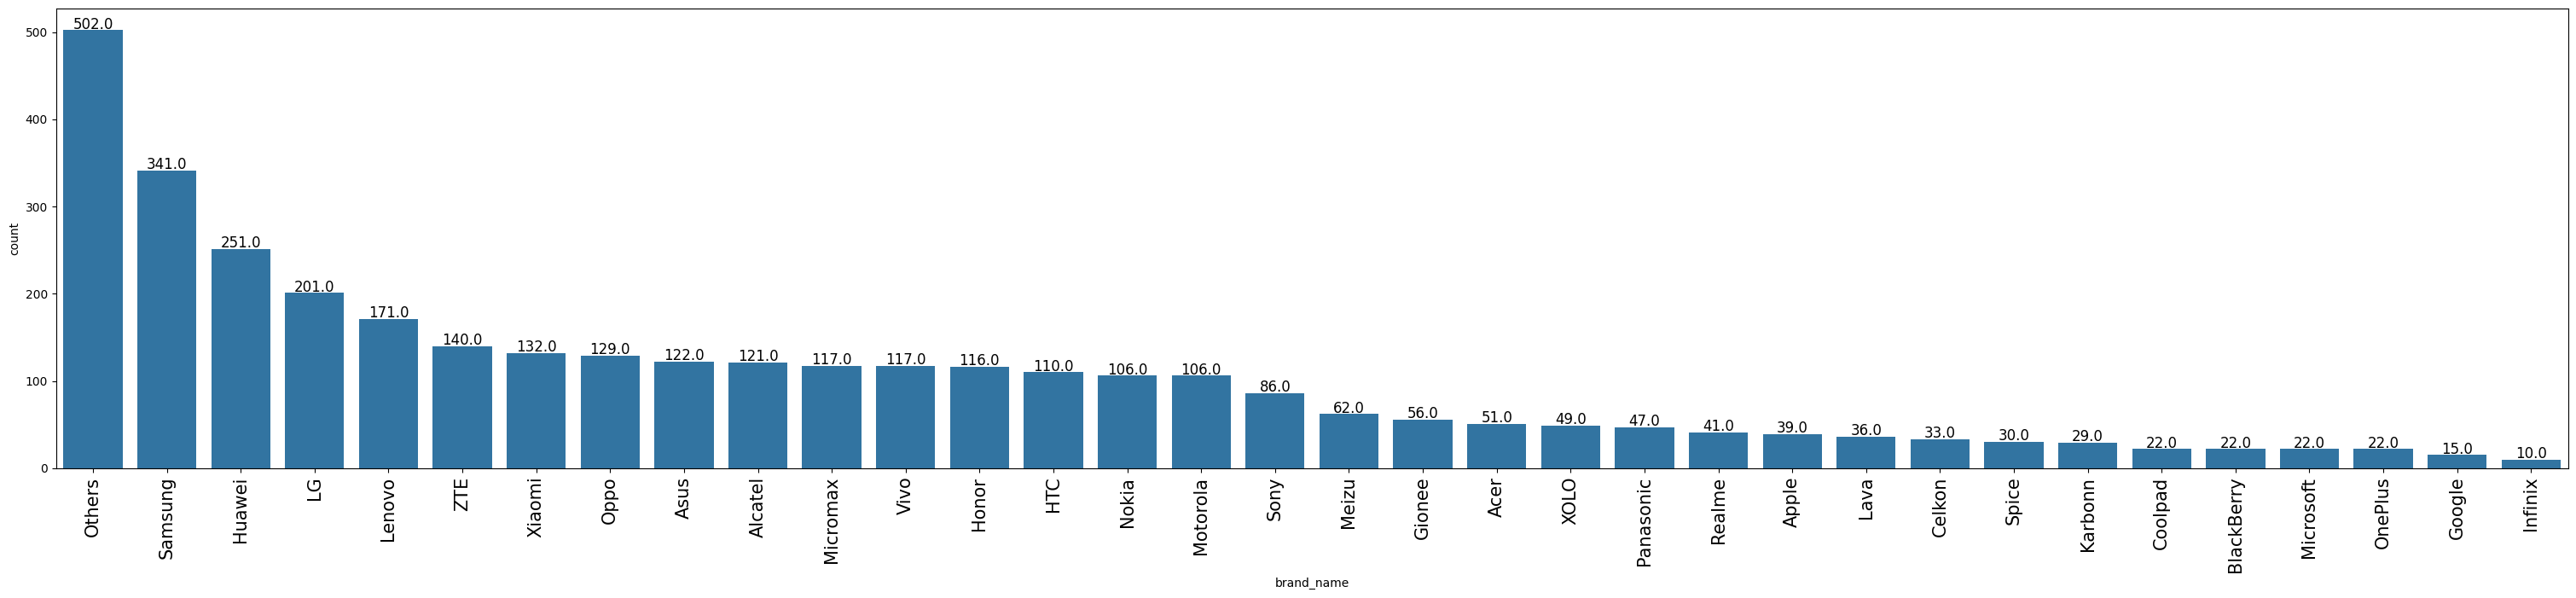

In [26]:
#Histogram and boxplot for the brand_name data
labeled_barplot(df, 'brand_name', perc=False, n=None)



In [27]:
print(df['brand_name'].value_counts().head())
print(df['brand_name'].value_counts().tail())

brand_name
Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
Name: count, dtype: int64
brand_name
BlackBerry    22
Microsoft     22
OnePlus       22
Google        15
Infinix       10
Name: count, dtype: int64


## Observation
#### The brand name classified as 'others' which probably means that the phones whose brand names could not be identified had the highest number (502) closely followed by Samsung brand (341) and then Huawei (251). The brands with the lowest counts are Oneplus(22), Google(15) and finally Infinix (10) which had the lowest count.

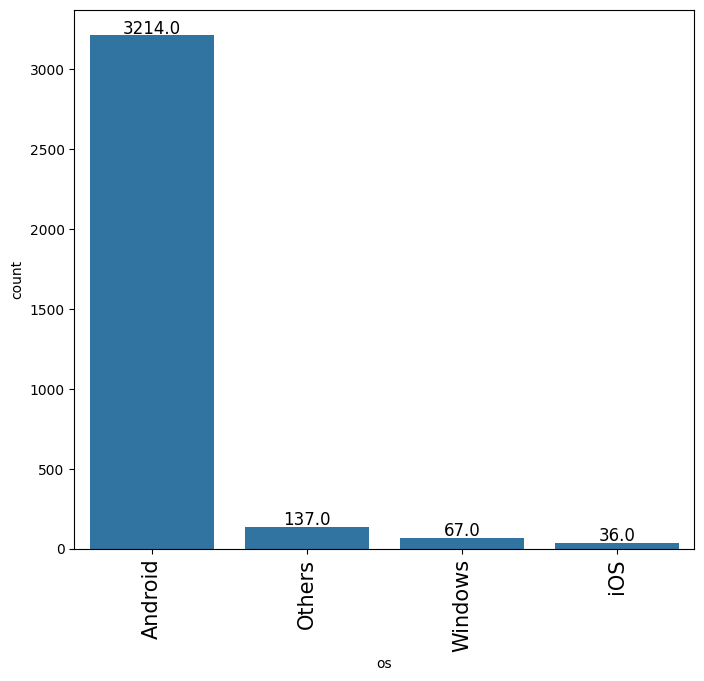

In [28]:
#Histogram and boxplot for the OS data
labeled_barplot(df, 'os', perc=False, n=None)

In [29]:
df['os'].value_counts(normalize = True)


,proportion
os,
Android,0.930515
Others,0.039664
Windows,0.019398
iOS,0.010423


## Observation
#### It will be observed that Android OS has the highest count(3214) and seems to be the most preferred OS. In fact, Android OS occupies about 93% of the entire market. The least popular OS is the iOS.

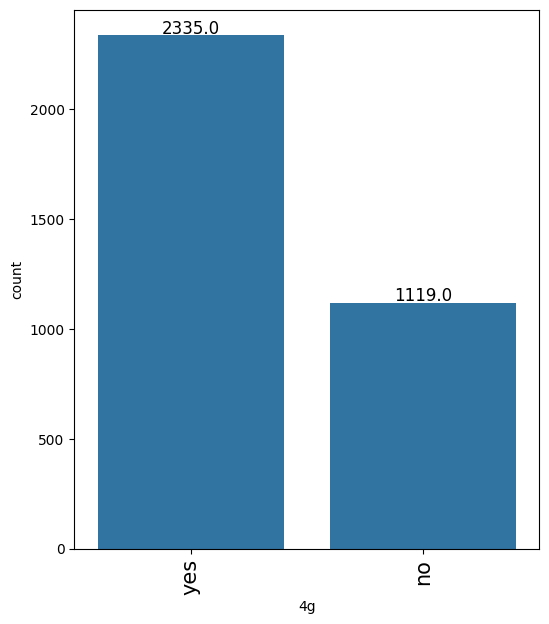

In [30]:
#Histogram and boxplot for the 4g data
labeled_barplot(df, '4g', perc=False, n=None)

## Observation
#### The phones where 4G was available (2335 counts) is more than twice those where 4G was not available (1119 counts).

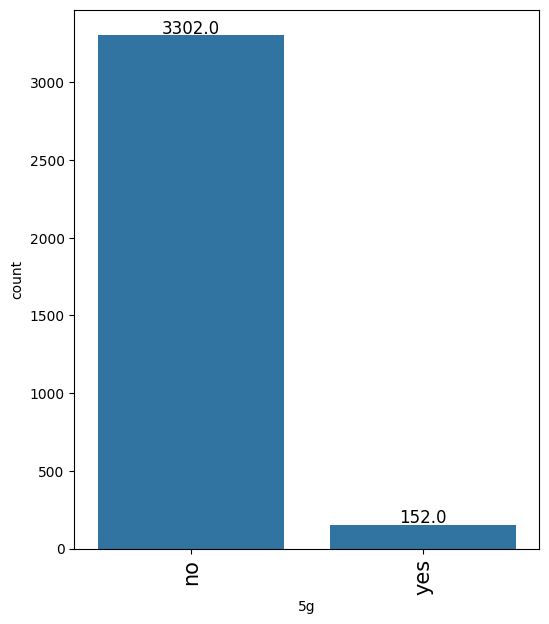

In [31]:
#Histogram and boxplot for the 5g data
labeled_barplot(df, '5g', perc=False, n=None)

## Observation
#### The phones where 5G is available (3302 counts) are more than twenty times those where 5G was not available (152 counts)

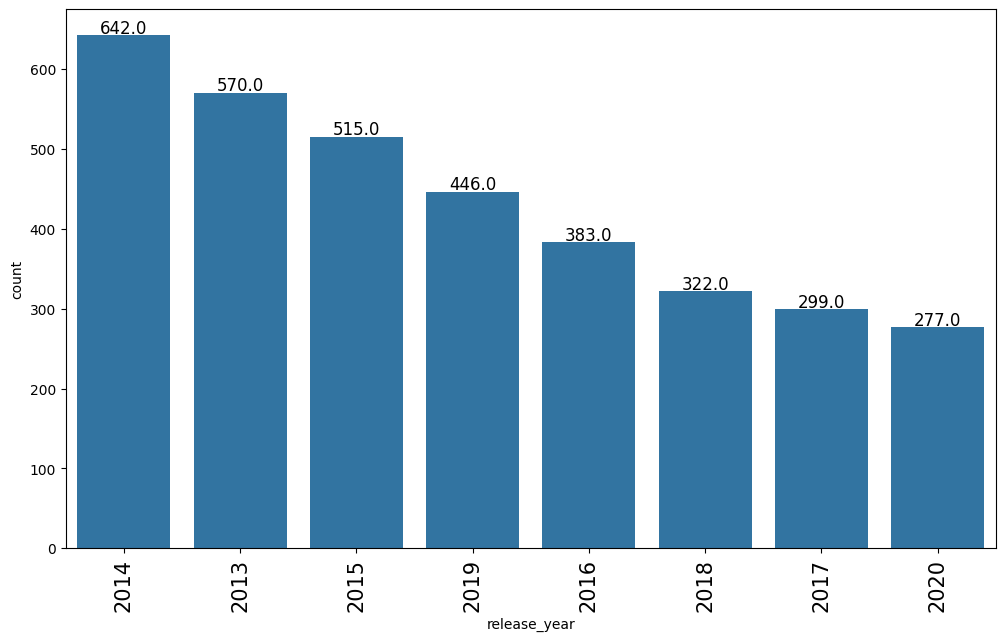

In [32]:
#Histogram and boxplot for the release_year data
labeled_barplot(df, 'release_year', perc=False, n=None)

## Observation
#### The phones that were released in 2014 had the highest count (642) closely followed by those released in 2013 and 2015 with counts of 570 and 515 respectively. The release year with the lowest phone count is 2020 (277 counts)

## Bivariate Analysis

In [33]:
#Create list of the columns in the dataset
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

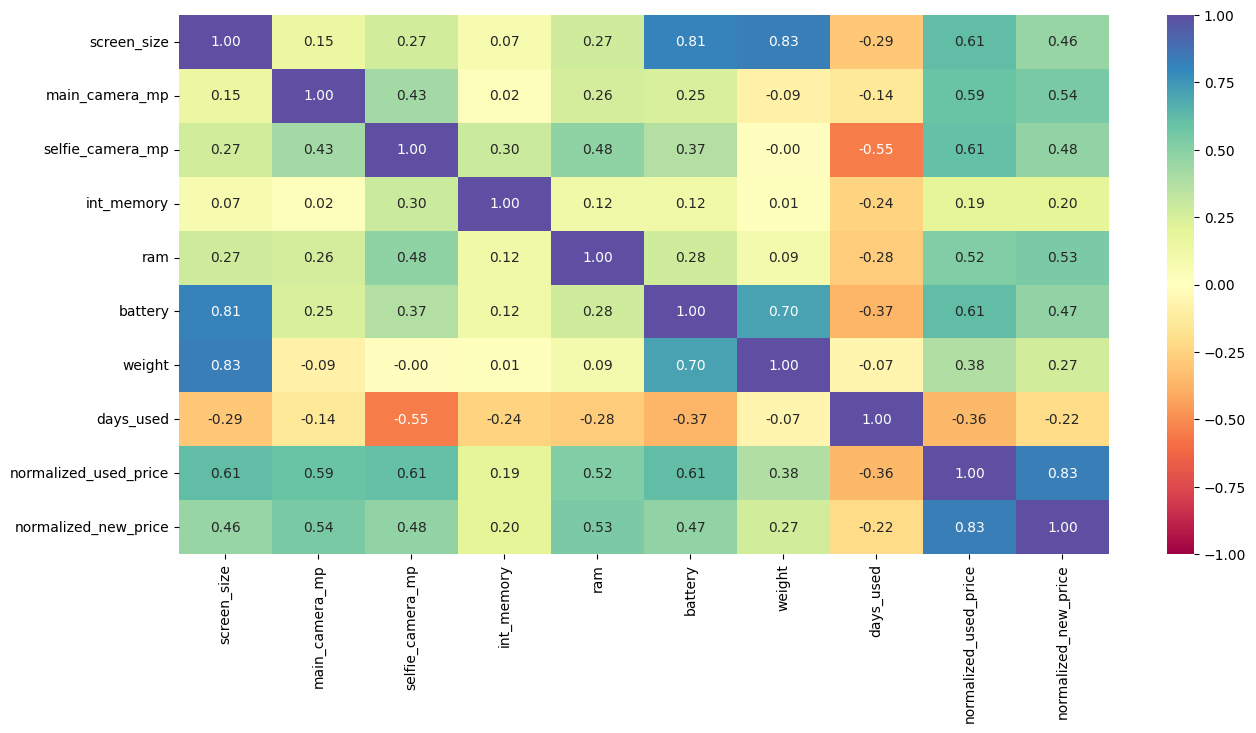

In [34]:
# Checking the correlation among the variables

# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Observation
#### The normalized used price of the phones is strongly and positively correlated with the screen size, the resolution of both the main and selfie cameras, the ram size and the battery but it is also weakly and positively correlated with the size of the internal memory andd the weight of the phone. the normalized used price was also found to negatively correlated with the days used albeit weakly.

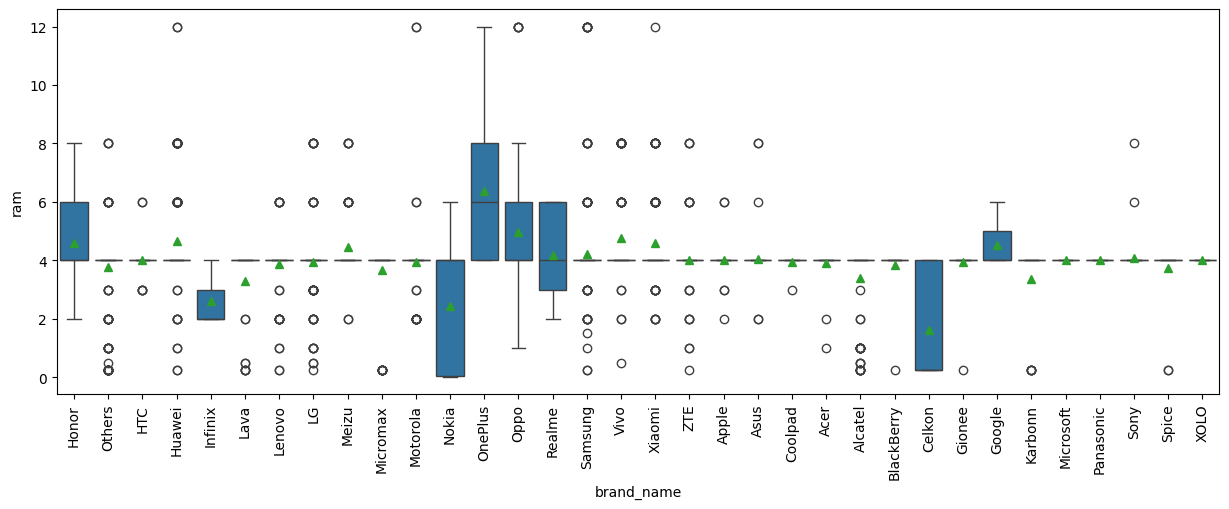

In [35]:
# Variation of the size of the ram for the different brands.
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram", showmeans = True)
plt.xticks(rotation=90)
plt.show()

## Observation
#### It will be observed that the Oneplus brand had the highest average and median ram size (about 6 Gb) closely followed by Oppo brand with an average ram size of about 5 Gb. It will be also worth noting that across all the brands, the average ram size is about 4 Gb with the exception of Infinix, Nokia and Celkon with ram sizes of about 2.8 Gb, 2.8 Gb and 2.0 Gb respectively.

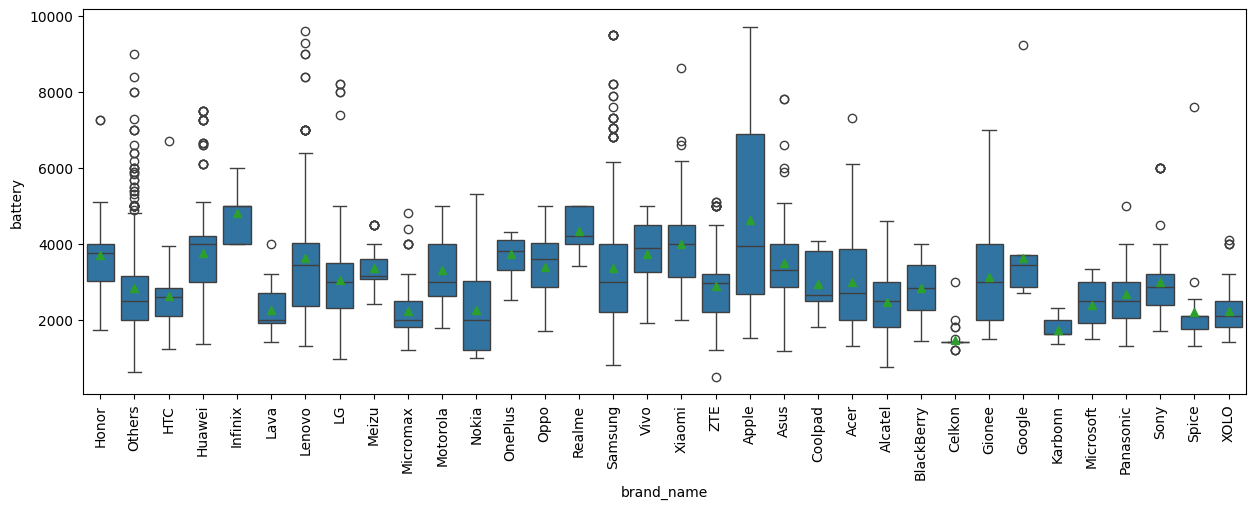

In [36]:
#Variation of the brand name according to the battery size
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="battery", showmeans = True)
plt.xticks(rotation=90)
plt.show()

## Observation
#### It will be observed that the Infinix and Apple brands seem to have the largest battery capacity of about 5,000 mAh on average while Celkon brand had the lowest battery capacity of about 1,500 mAh on average.

In [37]:
# Lets obtain data of devices whose battery capacities are larger than a threshold of 4,500 mAh
df_battery_above_4500 = df[df['battery'] > 4500]
df_battery_above_4500.shape[0]



341

## Observation
#### 341 phone devices have a battery capacities greater than 4,500 mAh

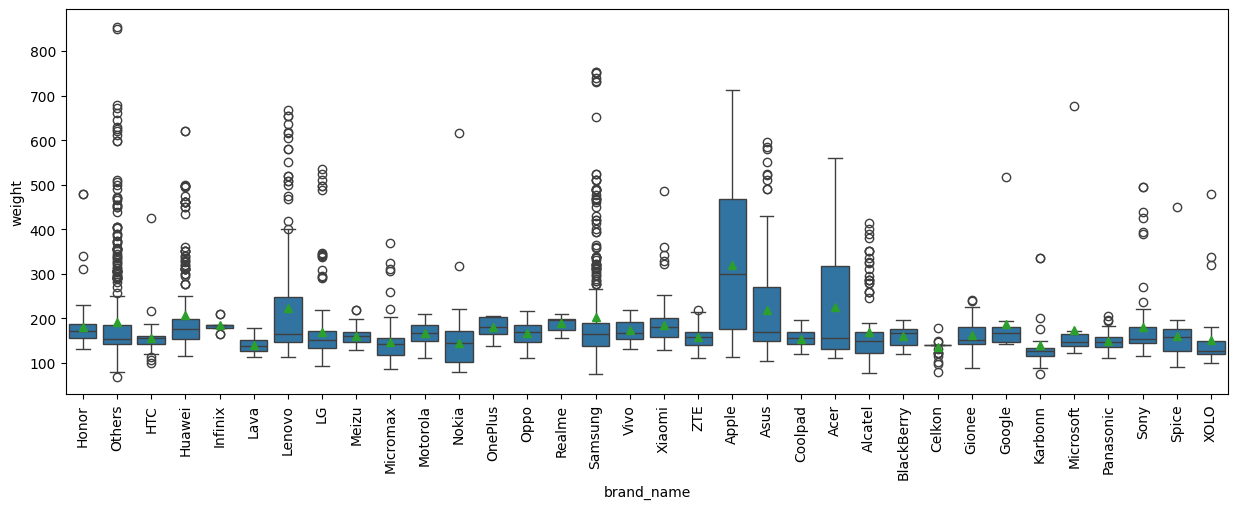

In [38]:
# Variation of the brand name and the weight of the phone
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight", showmeans = True)
plt.xticks(rotation=90)
plt.show()


## Observation
#### The Apple brand seems to be the heaviest due to the large battery capacity while Celkon and Karbonn are the lightest phones due to the smaller battery capacity.

In [39]:
# Database containing phones with larger sreen sizes of threshold 6 * 2.54 cm
df_large_screen_size = df[df['screen_size'] > 6 * 2.54]
df_large_screen_size.shape[0]

1099

## Observation
#### A total of 1,099 phones have larger screen sizes greater than 6 * 2.54 cm

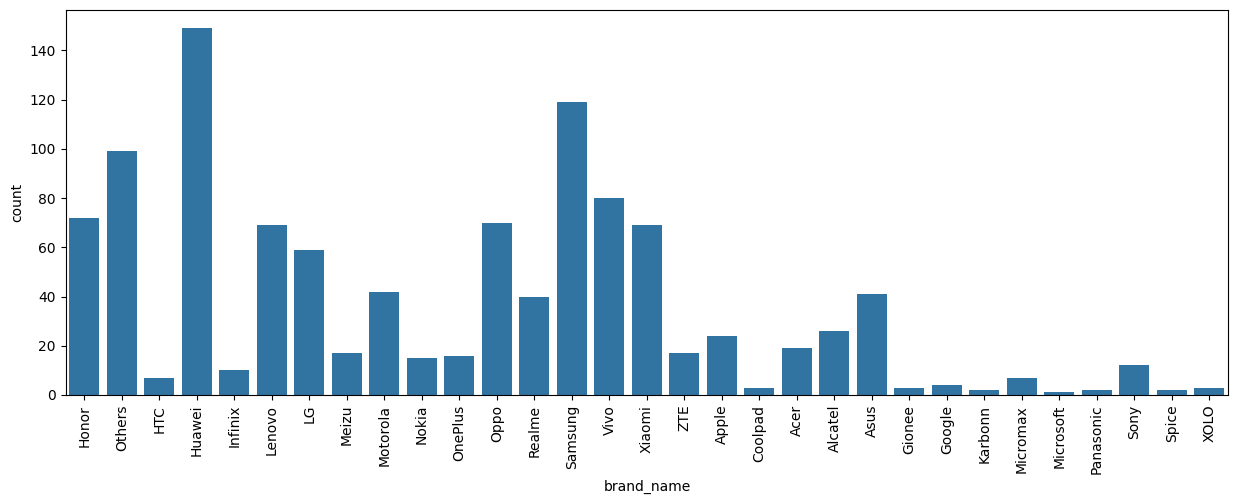

In [40]:
# Count plot for the brand names in large screen dataframe
plt.figure(figsize=(15, 5))
sns.countplot(data=df_large_screen_size, x="brand_name")
plt.xticks(rotation=90)
plt.show()

In [41]:
df_large_screen_size['brand_name'].value_counts().head()

,count
brand_name,
Huawei,149
Samsung,119
Others,99
Vivo,80
Honor,72


## Observation
#### It will be observed that the Huawei brand is very popular when it comes to large screen size phones with a count of 149 closely followed by Samsung brand with a count of 119. The brand that is least popular in terms of large screen size is the Microsoft brand.

In [42]:
# Dataset of phones with high resolution selfie camera (above 8 MP)
df_selfie_camera_high_resolution = df[df['selfie_camera_mp'] > 8]
df_selfie_camera_high_resolution.shape[0]

655

## Observation
#### A total of 655 phones have a selfie camera resolution above 8 MP.

In [43]:
# Obtaining the counts of the brand names with high resolution selfie camera
print(df_selfie_camera_high_resolution['brand_name'].value_counts().head())
print(df_selfie_camera_high_resolution['brand_name'].value_counts().tail())

brand_name
Huawei     87
Vivo       78
Oppo       75
Xiaomi     63
Samsung    57
Name: count, dtype: int64
brand_name
Coolpad       3
BlackBerry    2
Micromax      2
Panasonic     2
Acer          1
Name: count, dtype: int64


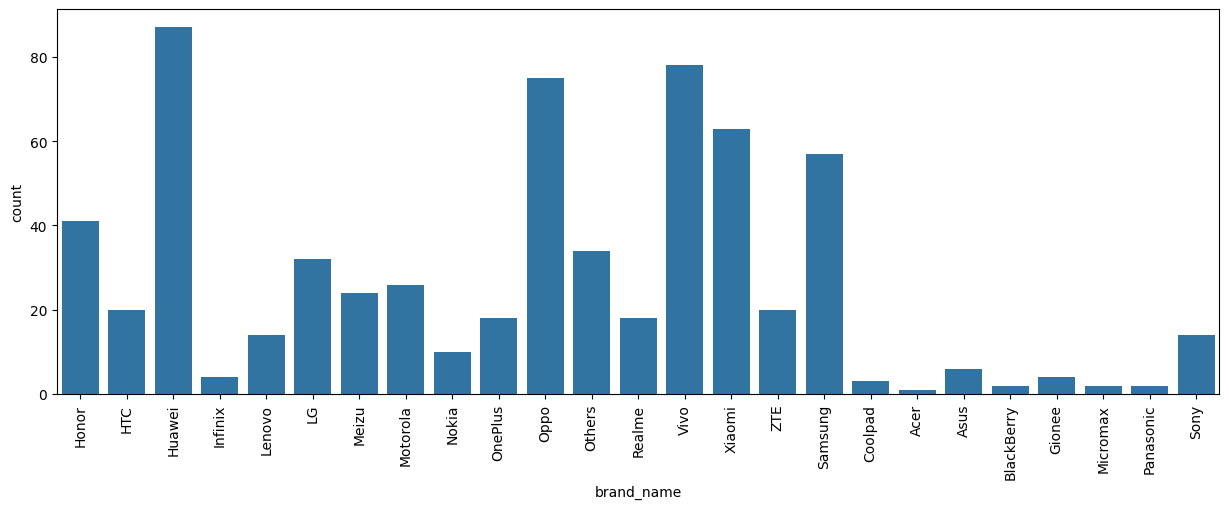

In [44]:
# Count plot for the brand names in high resolution selfie camera dataframe
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera_high_resolution, x="brand_name")
plt.xticks(rotation=90)
plt.show()

## Observation
#### Among the phones having selfie camera of high resolution (above 8 MP), it will be observed that the Huawei brand had the highest count (87) closely followed by Vivo and Oppo brands with count of 77 and 75 respectively. However, the brand with the least count Micromax, Panasonic and finally Acer brands having the lowest count of 1.

In [45]:
# Dataset of phones with high resolution main camera (above 16 MP)
df_main_camera_high_resolution = df[df['main_camera_mp'] > 16]
df_main_camera_high_resolution.shape[0]

94

## Observation
#### Only 94 phones in total have main camera with high resolution above 8 MP

In [46]:
# Obtaining the counts of the brand names with high resolution main camera
print(df_main_camera_high_resolution['brand_name'].value_counts().head())
print(df_main_camera_high_resolution['brand_name'].value_counts().tail())

brand_name
Sony        37
Motorola    11
Others       9
HTC          6
ZTE          5
Name: count, dtype: int64
brand_name
Lenovo    1
Acer      1
Honor     1
Gionee    1
Xiaomi    1
Name: count, dtype: int64


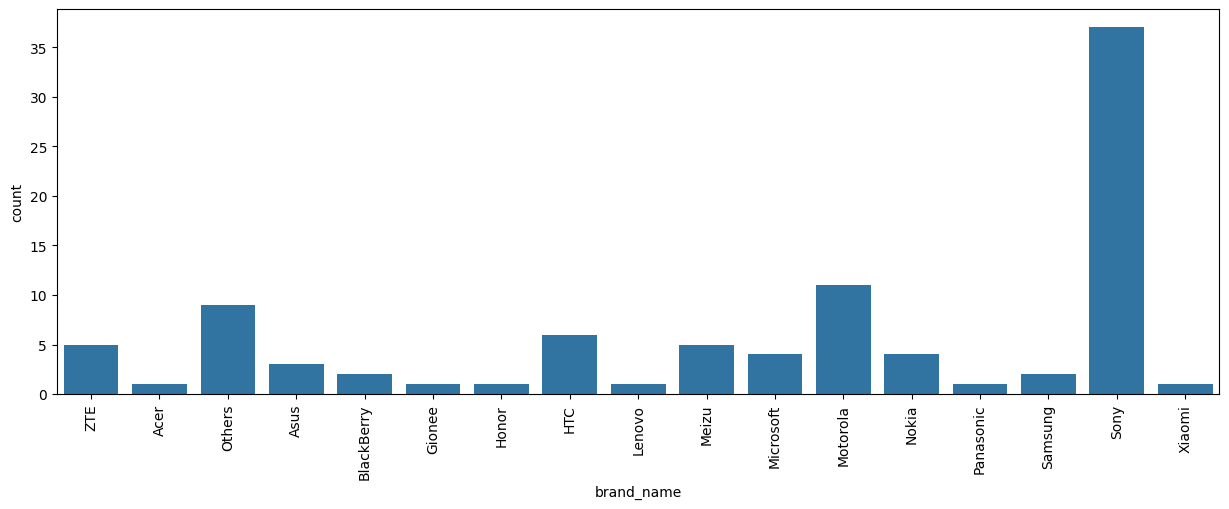

In [47]:
# Count plot for the brand names in high resolution main camera dataframe
plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera_high_resolution, x="brand_name")
plt.xticks(rotation=90)
plt.show()

## Observation
#### Among all the phones having a high resolution main camera, it will be observed that the Sony brand had the highest counts (37) closely followed by the Motorola brand with a count of 11. However, other phones having main camera of high resolution but with the lowest counts includes Lenovo, Acer, Honor and Gionee all having a count of one (1) each.

In [48]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

<ipython-input-49-b7ae2d5823ac>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price', ci = False) ## Complete the code to create a lineplot for release year and used price


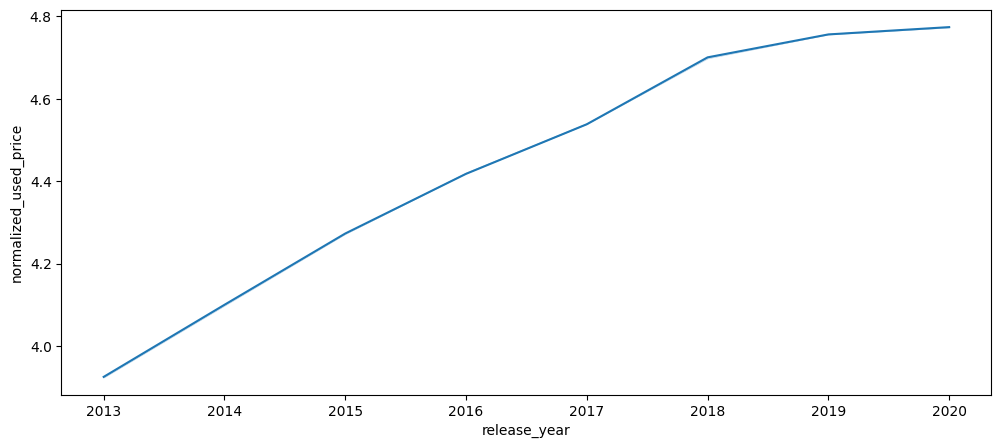

In [49]:
#
plt.figure(figsize=(12, 5))
sns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price', ci = False) ## Complete the code to create a lineplot for release year and used price
plt.show()

## Observation
#### It will be observed that there is a linear positive relationship between the Normalized_Used_price and the release_year. As the release_year increased from 2013 to 2020, a corresponding increase in the Normalized_used_price from about 2 euros to about 4.8 euros. In fact, between the release_year 2018 to 2020, there was only a marginal increase in the Normalize_used_price

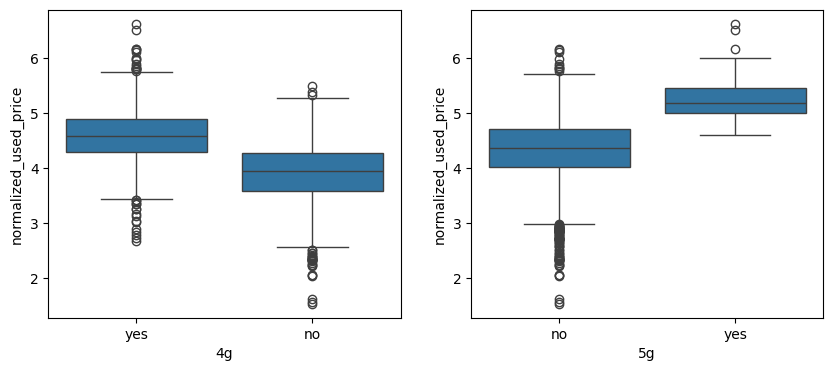

In [50]:
# Variation of prices of used phones based on their access to the 4G and 5G networks.
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Observation
#### The Normalized_used_price was higher on an average for phones having access to the 4G and 5G network respectively when compared to those phones with no access to 4G or 5G network which is quite intuitive.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Missing Value Imputation

In [51]:
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [52]:
# Imputing the missing values using the median values when grouped by released year
df['main_camera_mp'] = df['main_camera_mp'].fillna(value = df.groupby(['release_year'])['main_camera_mp'].transform('median'))
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(value = df.groupby(['release_year'])['selfie_camera_mp'].transform('median'))
df['int_memory'] = df['int_memory'].fillna(value = df.groupby(['release_year'])['int_memory'].transform('median'))
df['ram'] = df['ram'].fillna(value = df.groupby(['release_year'])['ram'].transform('median'))
df['battery'] = df['battery'].fillna(value = df.groupby(['release_year'])['battery'].transform('median'))
df['weight'] = df['weight'].fillna(value = df.groupby(['release_year'])['weight'].transform('median'))


In [53]:
# Checking for the missing values after imputation of the median
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


## Feature Engineering

#### Lets create a new column called year_since_released from the release_year column using 2021 as the baseline year.

In [54]:
df['year_since_released'] = 2021 - df['release_year']

# Dropping the release_year column to avoid collinearity
df.drop('release_year', axis = 1, inplace = True)

In [55]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'days_used', 'normalized_used_price', 'normalized_new_price',
       'year_since_released'],
      dtype='object')

##### The new column called 'year_since_released' was created and the old column called 'release_year' was removed.

## Outliers checks

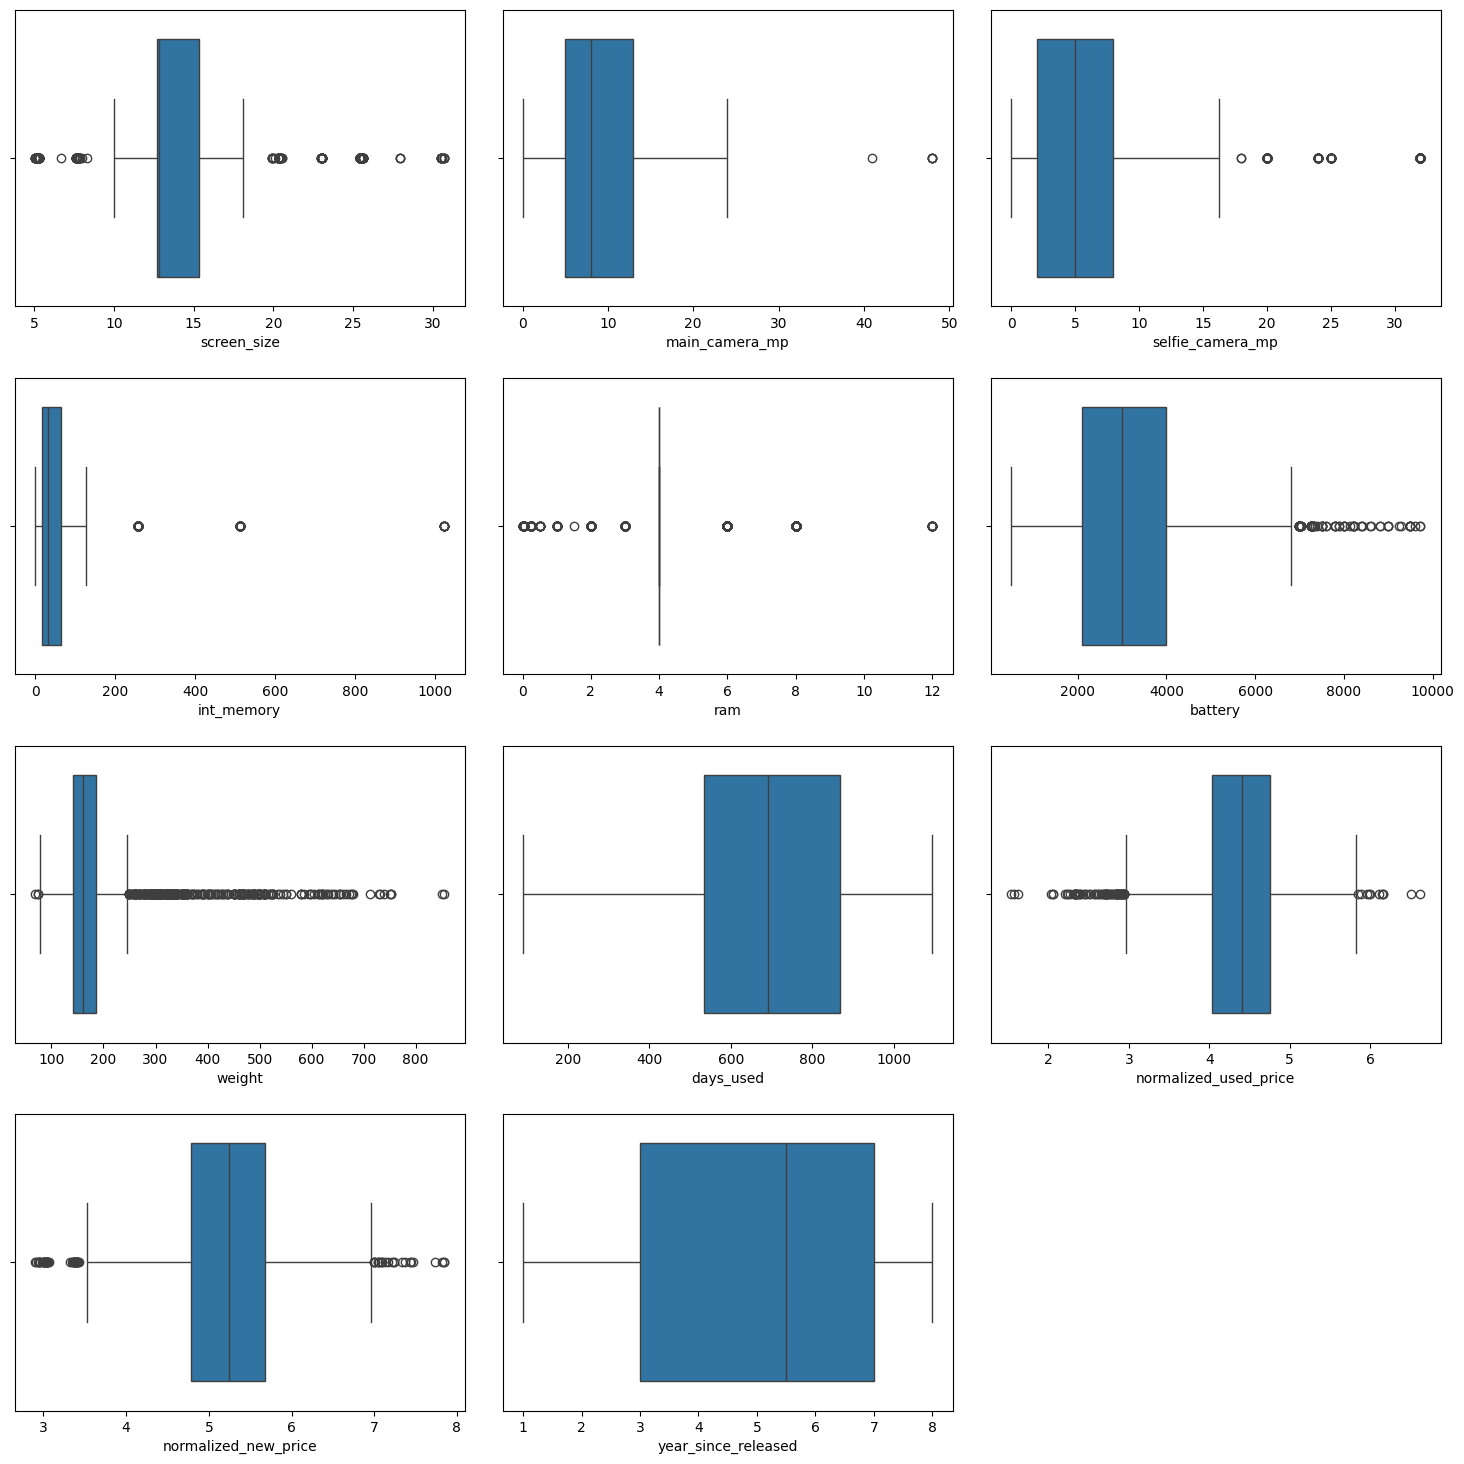

In [56]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## Observation
#### In all the dataset, the variables in each column appears to have outliers except the columns for 'days_used' and the 'year_since_released'.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [57]:
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


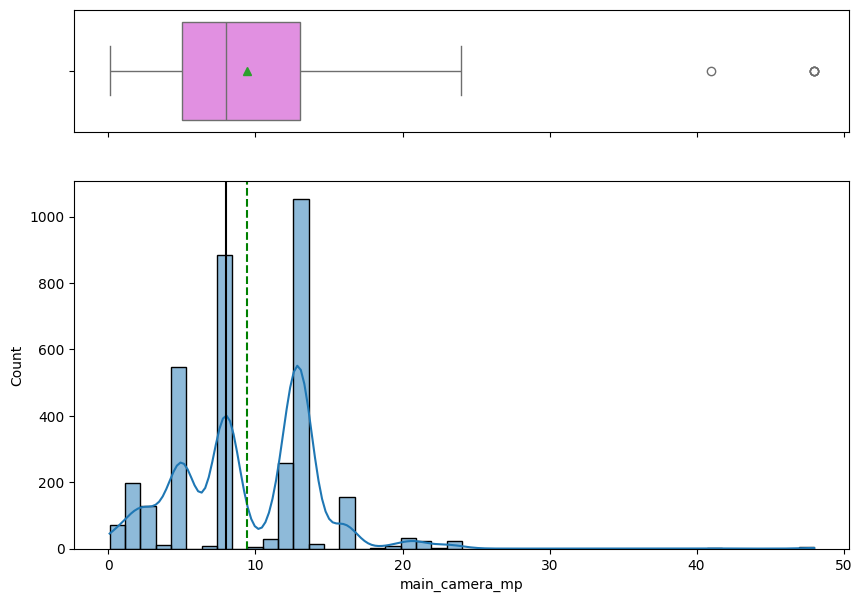

In [58]:
# Selected exploratory data analysis will be performed on the data after the imputation of the median on the missing data

#Histogram and boxplot for the main camera data
histogram_boxplot(df, "main_camera_mp")


## Observation
#### No significant change in the distribution of the histogram when compared with the one before inputation of the median probably because the missing values was not a vry significant proportion of the entire dataset.

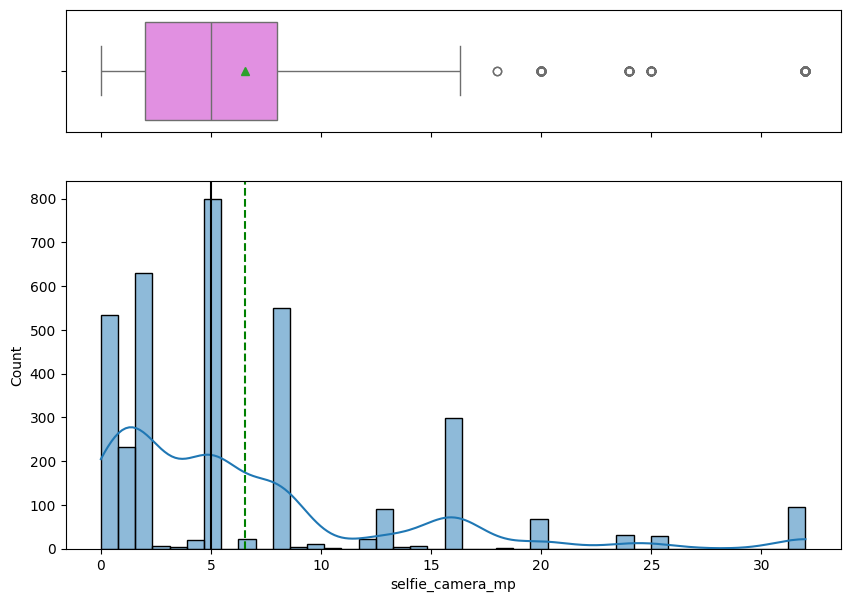

In [59]:
#Histogram and boxplot for the selfie camera data
histogram_boxplot(df, "selfie_camera_mp")

## Observation
#### There is no significant change in the distribution of the selfie-camera-mp data even after the imputation of the missing data.

## Model Building - Linear Regression


In [60]:
# Data preparation for model building
# Define the dependent and independent variables
X = df.drop('normalized_used_price', axis = 1)
y = df['normalized_used_price']

# Obtain the number of rows and columns in the independent and dependent variables
print(X.shape)
print(y.shape)

# Obtaining the first 5 rows in the independent and dependent variables
print(X.head())
print()
print(y.head())

(3454, 14)
(3454,)
  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  year_since_released  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  

In [61]:
# Lets add the intercept to the data
X = sm.add_constant(X)

In [62]:
# Adding dumming variables to the categorical data
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [63]:
# Converting the input attributes to float for modelling purposes.
X =X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# Splitting the data into 70:30 ratio for training and testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
# Obtaining the number of rows in the train and test data
print('Number of rows in the train data = ', X_train.shape[0])
print('Number of rows in the test data =', X_test.shape[0])

Number of rows in the train data =  2417
Number of rows in the test data = 1037


#### There are 2417 and 1037 train and test data respectively

In [65]:
# Building the linear regression model using the Ordinary Least Square (OLS) method
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                           09:36:52   Log-Likelihood:                 121.53
No. Observations:                   2417   AIC:                            -145.1
Df Residuals:                       2368   BIC:                             138.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Observation
#### R-squared value is 0.845 which is very good and it implies that 84.5% of the variations in the data can be explained by the model. The adjusted R-squared is also in close agreement with the R-squared value.
#### The constant coefficient which is the y-intercept is 1.33 which implies that even if the coefficients of the independent (predictor) variables are zero, the expected output (dependent) variable will be equal to 1.33.
#### Every other thing held constant, a unit change in screen_size will cause an increase in normalized_used_price by 0.0244 units.
#### Similarly, every other thing held constant, a unit change in main_camera_mp will cause an increase in normalized_used_price by 0.0203 units.

####Similar interpretations can be applied to the remaining predictor variables.


## Model Performance Check

#### We will be using metric functions defined in sklearn for RMSE, MAE, and R2.
#### We will define a function to calculate MAPE and adjusted  R2

In [76]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

     # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model_train_perf = model_performance_regression(ols_model, X_train, y_train)
ols_model_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230105,0.180571,0.844587,0.84137,4.332694


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model_test_perf = model_performance_regression(ols_model, X_test, y_test)
ols_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239083,0.185073,0.841519,0.833651,4.511746


## Observation
#### The training R-squared is 0.84 which means that the model was able to account for 84% variation in the training data and it is not underfitting.
#### The training and the test RMSE and MAE are comparable, hence the model is not overfitting.
#### A MAPE of 4.51 on the test data means that the model was able to predict within 4.51% of the normalized_used_price data.
#### MAE suggests that the model can predict normalized_used_price within an error of 0.185 on the test data.


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

## TEST FOR MULTICOLLINEARITY

In [80]:
# The Variance Inflation Factor (VIF) method will be used to test for multicollinearity in the data.
# Lets define a function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [81]:
checking_vif(X_train)

,feature,VIF
0,const,228.926905
1,screen_size,7.681828
2,main_camera_mp,2.201190
3,selfie_camera_mp,2.811591
4,int_memory,1.361251
5,ram,2.239531
6,battery,4.042104
7,weight,6.372828
8,days_used,2.668030
9,normalized_new_price,3.144145


## Observations
#### From the VIF data obtained, it will be noted that most of the predictor variables had VIF < 5 which indicates that low multicollinearity exist among them. However, the screen_size and weight columns had VIF > 5 which shows the existence of significant multicollinearity  between these variables and other predictor variables.
#### To solve the problem of multicollinearity, we will systematically drop the numerical columns with VIF > 5.
#### We will ignore the VIF values for the intercept (constant) and that of the other dummy variables.






In [82]:
# Lets define a function that will check if the VIF is greater than 5
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        ols_model1 = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(ols_model1.rsquared_adj)
        rmse.append(np.sqrt(ols_model1.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [83]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838089,0.234915
1,weight,0.837839,0.235096


## Observation
#### It will be noted the Adj. R-squared after dropping each of the two predictor variables with high VIF are almost similar including the values of the RMSE. However, dropping the screen_size column had the least effect on the Adj. R-squared, hence it will be dropped.

In [85]:
col_to_drop = "screen_size"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,203.877231
1,main_camera_mp,2.197986
2,selfie_camera_mp,2.808155
3,int_memory,1.359116
4,ram,2.239531
5,battery,3.805616
6,weight,2.960856
7,days_used,2.656096
8,normalized_new_price,3.102312
9,year_since_released,4.724063


## Observation
#### The multicollinearity among the predictor variables have been adequately dealt with since no numerical variable had VIF > 5.
#### A new model will be built using the updated data of the predicator variables.

In [86]:
ols_mod2 = sm.OLS(y_train, X_train2).fit()
print(ols_mod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.1
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                           11:29:09   Log-Likelihood:                 95.770
No. Observations:                   2417   AIC:                            -95.54
Df Residuals:                       2369   BIC:                             182.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Observation
#### It can be observed that R-squared had dropped from 0.845 to 0.841 and the Adj. R-squared had also dropped from 841 to 0.838 which indicates that the dropped columns do not have significant effect on the predictive ability of the model.
#### Also, since multicollinearity among the predictor variables had been dealt with, a very important step is to look at the p-values of each of the predictor variables to ascertain the level of their significance.







In [88]:
# Create a loop that will check the predictor variables whose p-values are greater than 0.05 (5% significance level) and dropping them.

# initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'year_since_released', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [89]:

X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [90]:

ols_mod3 = sm.OLS(y_train, X_train3).fit()
print(ols_mod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.0
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                           11:46:46   Log-Likelihood:                 78.551
No. Observations:                   2417   AIC:                            -129.1
Df Residuals:                       2403   BIC:                            -48.04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [91]:

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_mod3_train_perf = model_performance_regression(ols_mod3, X_train3, y_train)
ols_mod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234233,0.183132,0.838961,0.838022,4.402623


In [93]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
ols_mod3_test_perf = model_performance_regression(ols_mod3, X_test3, y_test)
ols_mod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24109,0.18629,0.838847,0.83664,4.547497


## Observation
#### It will be observed that no predictor variable had a p-value greater than 0.05,hence we will consider all the predictor variables (features) in the X_train3 as the final set of predictor variables and ols_model3 as the final model to use in subsequent analysis.
#### The adjusted R-squared in the new model is 0.838 which indicates that the model was able to explain ~83.8% of the variance in the train data and about 83.6% of the variance in the test data which is quite good.
#### The RMSE and MAE values for the train and test datasets are very comparable which rightly indicates that the model is not overfitting.




### Now we'll check the rest of the assumptions on ols_mod3.

### Linearity of variables

### Independence of error terms

### Normality of error terms

### No Heteroscedasticity

## TEST FOR LINEARITY AND INDEPENDENCE

In [94]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = ols_mod3.fittedvalues  # predicted values
df_pred["Residuals"] = ols_mod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.877460,0.210027
1525,4.448399,4.607293,-0.158894
1128,4.315353,4.296823,0.018529
3003,4.282068,4.244393,0.037675
2907,4.456438,4.466561,-0.010123


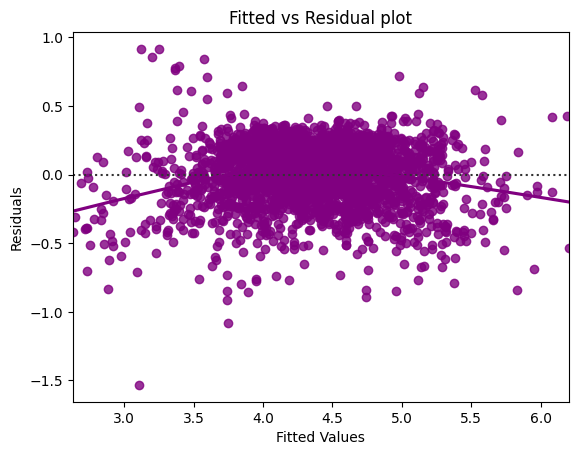

In [95]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Observation
#### The scatter plot shows the distribution of the residuals(errors) Vs fitted values (predicted values).
#### It can be observed that no pattern can be explicitly observed from the plot, therefore no any form of non-linearity in the data, hence the assumptions of linearity and independence are satisfied.




## TEST FOR NORMALITY

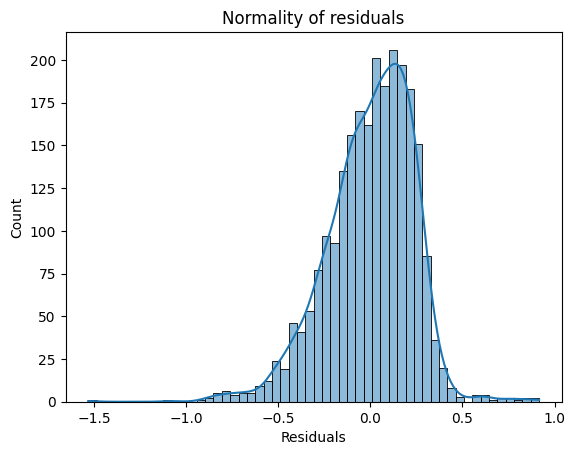

In [96]:
# Obtaining the normal distribution plot of the residues
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

## Observations
#### The histogram of the residues does have a bell-shape, however the left-tail is abnormally long which indicates slight deviation from normality. Further test such as the Q-Q plot will be done on the data.

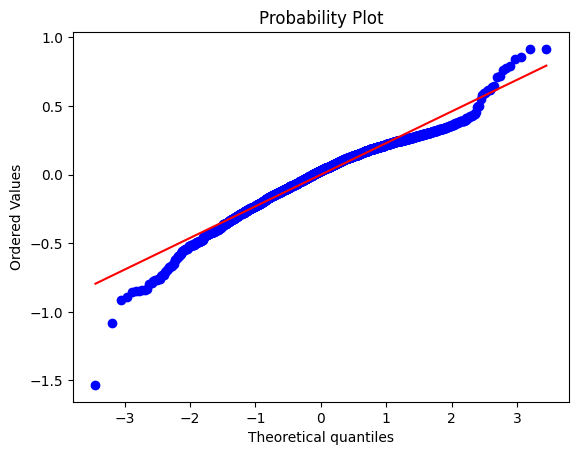

In [97]:
# Obtaining the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

## Observation
#### It will be observed that the majority of the data follow the straight line except the ones on the tails.
#### The Shapiro-Wilks test can further be performed on the data

In [98]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.968801532782211, pvalue=1.6800225167826967e-22)

## Observations
#### Since the p-value from the Shapiro-Wilk's test is far less than 0.05, the null hypothesis that states that the residues are normal will be rejected, therefore, we will fail to reject the alternative hypothesis that states that the residuals are not normal. In the truest sense, the residues are not normal, however the distribution of the residues can be accepted as close to normal as an approximation and in that sense, the assumption of normality can be said to be satisfied.









## TEST FOR HOMOSCEDASTICITY

In [100]:
# Determining the p-value to decise if the data is homoscedastic or not.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0092547146589543), ('p-value', 0.4367683961010225)]

## Observation
#### Since the p-value is greater than 0.05, we will fail to reject the null hypothesis that says that the residues are homoscedastic, hence the assumption of homoscedasticity have been satisfied.

## Prediction on test data

In [101]:
# predictions on the test set
pred = ols_mod3.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.392269
2341,3.696103,3.983448
1913,3.592093,3.654164
688,4.306495,4.078154
650,4.522115,5.109482
2291,4.259294,4.372728
40,4.997685,5.463827
1884,3.875359,4.063095
2538,4.206631,4.036947
45,5.380450,5.293992


## Observation
#### It can be observed that the newly developed model is able to predict the normalized_used_price to a good degree and the predicted values are comparable to the actual values.

## Final Model

In [103]:
#Creating the final model and extract valuable insights.
# Creating copies of the train and test data
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [105]:
ols_model_final = sm.OLS(y_train, X_train_final).fit()
print(ols_model_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.0
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                           12:41:13   Log-Likelihood:                 78.551
No. Observations:                   2417   AIC:                            -129.1
Df Residuals:                       2403   BIC:                            -48.04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [107]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model_final_train_perf = model_performance_regression(
    ols_model_final, X_train_final, y_train
)
ols_model_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234233,0.183132,0.838961,0.838022,4.402623


In [109]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model_final_test_perf = model_performance_regression(
    ols_model_final, X_test_final, y_test
)
ols_model_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24109,0.18629,0.838847,0.83664,4.547497


## Actionable Insights and Recommendations

#### From the summary statistics of the entire dataset, it can be observed that the most popular brand fell among the 'other' category while the most popular OS is the Android. The average screen size is about 13.7 cm and it ranges from 5.08 cm to 30.71 cm.
#### The average resolution of the main camera is about 9.5 MP and it ranges from 0.08 MP to 48 MP whereas for the selfie camera, the average resolution is about 6.6 MP and it ranges from 0 MP to about 32 MP.
#### The average internal memory of the phones is about 55 Gb and it ranges from 0.01 Gb to about 1 Tb. Similarly, the average size of the ram for all phones is about 4 Gb while the maximum ram is about 12 Gb.
#### The average normalized price of a used phone and a new phone are 4.3 euros and 5.2 euros respectively and the normalized prices ranges from 1.5 euros to 6.6 euros and 2.9 euros to 7.8 euros respectively
#### The brand name classified as 'others' which probably means the phones whose brand names could not be identified had the highest number count (502) closely followed by Samsung brand (341) and then Huawei (251). The brands with the lowest counts are Oneplus(22), Google(15) and finally Infinix (10) which had the lowest count.
#### In terms of the Operating System (OS) it will be observed that Android OS has the highest count(3214) and seems to be the most preferred OS. In fact, Android OS occupies about 93% of the entire market. The least popular OS is the iOS.
#### The phones where 4G was available (2335 counts) is more than twice those where 4G was not available (1119 counts). Similarly, The phones where 5G is available (3302 counts) are more than twenty times those where 5G was not available (152 counts)
#### The phones that were released in the year 2014 had the highest count (642) closely followed by those released in 2013 and 2015 with counts of 570 and 515 respectively. The release year with the lowest phone count is 2020 (277 counts)
####  It will be observed that the Oneplus brand had the highest average and median ram size (about 6 Gb) closely followed by Oppo brand with an average ram size of about 5 Gb. It will be also worth noting that across all the brands, the average ram size is about 4 Gb with the exception of Infinix, Nokia and Celkon with ram sizes of about 2.8 Gb, 2.8 Gb and 2.0 Gb respectively.
#### It will be observed that the Infinix and Apple brands seem to have the largest battery capacity of about 5,000 mAh on average while Celkon brand had the lowest battery capacity of about 1,500 mAh on average
#### Keeping every other thing constant, a unit increase in the following predictor variables; main_camera_mp, selfie_camera_mp, ram,, weight, and normalized_new_price will cause an increase in the normalized_used_price by the following units: 0.0211, 0.0137, 0.0195, 0.0017, and 0.4370 respectively.
#### Similarly, keeping every other thing constant, a unit increase in the following predictor variables; year_since_released, brand_name_others, brand_name_samsung, brand_name_sony, brand_name_xiaomi, os_others and os_ios will cause a decrease in the normalized_used_price by the following units: 0.0299, 0.0301, 0.0435, 0.0683, 0.084, 0.1383 and 0.0921 respectively.
#### The model was able to account up to 83.9% of the variance in the train data and 83.88% in the test data which is very good.
#### The RMSE and MAE of the train and test data are very comparable which shows that the model is not overfitting the data.
#### The MAPE in the test data which is 4.55% suggest that the model can predict within 4.55% of the normalized_used_price data.

## Recommendation
#### In order to fully understand all the factors that could affect the price of the used phones or tablets, information regarding the seasonality of the demand of used phones and the demography of the buyers will be very key to developing a more robust model.
#### More information regarding the phones categorized as 'others' needs to be obtained and reducing the count of this category to the barest minimum will certainly affect the performance of the model.

-


___